In [13]:
#Dependencies 
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

# Study data files
path = "./data/processed_data_toDummies.csv"
# Import the CSV into a pandas DataFrame
df = pd.read_csv(path)
# Display the data table for preview
df

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,2 to 9 employees,Computer science,2.0,1,1,NaN,NaN
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,100 to 499 employees,Computer science,3.0,1,0,NaN,NaN
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,"5,000 to 9,999 employees",Computer science,4.0,1,0,NaN,NaN
3,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,20 to 99 employees,Computer science,15.0,0,1,NaN,NaN
4,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,100 to 499 employees,Computer science,5.0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33596,2020,Yes,225000.00000,United States,Some college/university study without earning ...,Employed full-time,8.0,"1,000 to 4,999 employees",Mathematics or statistics,15.0,0,0,0.0,1.0
33597,2020,Yes,369.00000,"Venezuela, Bolivarian Republic of...",Some college/university study without earning ...,Employed full-time,2.0,"1,000 to 4,999 employees",Computer science,27.0,0,1,0.0,1.0
33598,2020,No,38484.00000,Hungary,Master's degree,"Independent contractor, freelancer, or self-em...",8.0,"Just me - I am a freelancer, sole proprietor, ...",Humanities,12.0,0,0,1.0,0.0
33599,2020,Yes,140000.00000,United States,Doctoral degree,Employed full-time,8.0,"10,000 or more employees",Another engineering discipline,12.0,1,0,1.0,1.0


In [14]:
reduced = df.dropna()
reduced

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
13355,2019,Yes,95179.0,New Zealand,Some college/university study without earning ...,Employed full-time,6.0,10 to 19 employees,Computer science,4.0,0,1,0.0,0.0
13357,2019,Yes,90000.0,United States,Master's degree,Employed full-time,8.0,10 to 19 employees,Computer science,8.0,0,1,1.0,1.0
13358,2019,Yes,21996.0,Russian Federation,Master's degree,Employed full-time,8.0,"1,000 to 4,999 employees",Computer science,3.0,0,0,1.0,0.0
13359,2019,No,41244.0,Lithuania,Master's degree,Employed full-time,4.0,"1,000 to 4,999 employees",Information systems,4.0,0,1,0.0,0.0
13361,2019,No,8400.0,Argentina,Master's degree,Employed full-time,8.0,"10,000 or more employees",Natural science,3.0,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33596,2020,Yes,225000.0,United States,Some college/university study without earning ...,Employed full-time,8.0,"1,000 to 4,999 employees",Mathematics or statistics,15.0,0,0,0.0,1.0
33597,2020,Yes,369.0,"Venezuela, Bolivarian Republic of...",Some college/university study without earning ...,Employed full-time,2.0,"1,000 to 4,999 employees",Computer science,27.0,0,1,0.0,1.0
33598,2020,No,38484.0,Hungary,Master's degree,"Independent contractor, freelancer, or self-em...",8.0,"Just me - I am a freelancer, sole proprietor, ...",Humanities,12.0,0,0,1.0,0.0
33599,2020,Yes,140000.0,United States,Doctoral degree,Employed full-time,8.0,"10,000 or more employees",Another engineering discipline,12.0,1,0,1.0,1.0


In [15]:
reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 13355 to 33600
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           17976 non-null  int64  
 1   Hobbyist                                       17976 non-null  object 
 2   ConvertedComp                                  17976 non-null  float64
 3   Country                                        17976 non-null  object 
 4   EdLevel                                        17976 non-null  object 
 5   Employment                                     17976 non-null  object 
 6   JobSat                                         17976 non-null  float64
 7   OrgSize                                        17976 non-null  object 
 8   UndergradMajor                                 17976 non-null  object 
 9   YearsCodePro                                  

In [16]:
reduced.keys()

Index(['Year', 'Hobbyist', 'ConvertedComp', 'Country', 'EdLevel', 'Employment',
       'JobSat', 'OrgSize', 'UndergradMajor', 'YearsCodePro',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Data or business analyst', 'Engineer, data'],
      dtype='object')

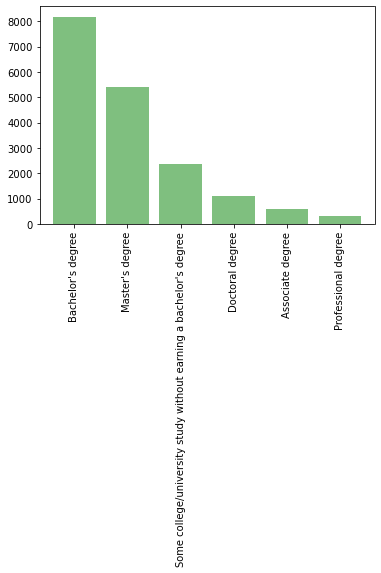

In [17]:
#Graph degrees' total amounts in this dataset
bar_plot = reduced['EdLevel'].value_counts().plot.bar(width = 0.8, color = "green", alpha = .5)